In [6]:
# Data preprocessing

import csv
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

file = open(r"Future/compas-scores-two-years-corrected.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

battery_scores = [score_text[x] for x in range(len(score_text)) if c_charge_desc[x] == 'Battery']
possession_scores = [score_text[x] for x in range(len(score_text)) if ('Possession' in c_charge_desc[x]) and 
                  (not "Aggravated" in c_charge_desc[x])]

Null hypothesis (proposed distribution): [0.19, 0.81]

Proposed distribution rejected at alpha = 0.05. Kardis = 1.18655565873399e-8.
Any plausible distribution must boost probability over the given distribution by 4213877.33748185, and will therefore have a minimum probability of 7.4506199919858e-6.
Closest plausible distribution: [0.22408202889012038, 0.7759179711098796]


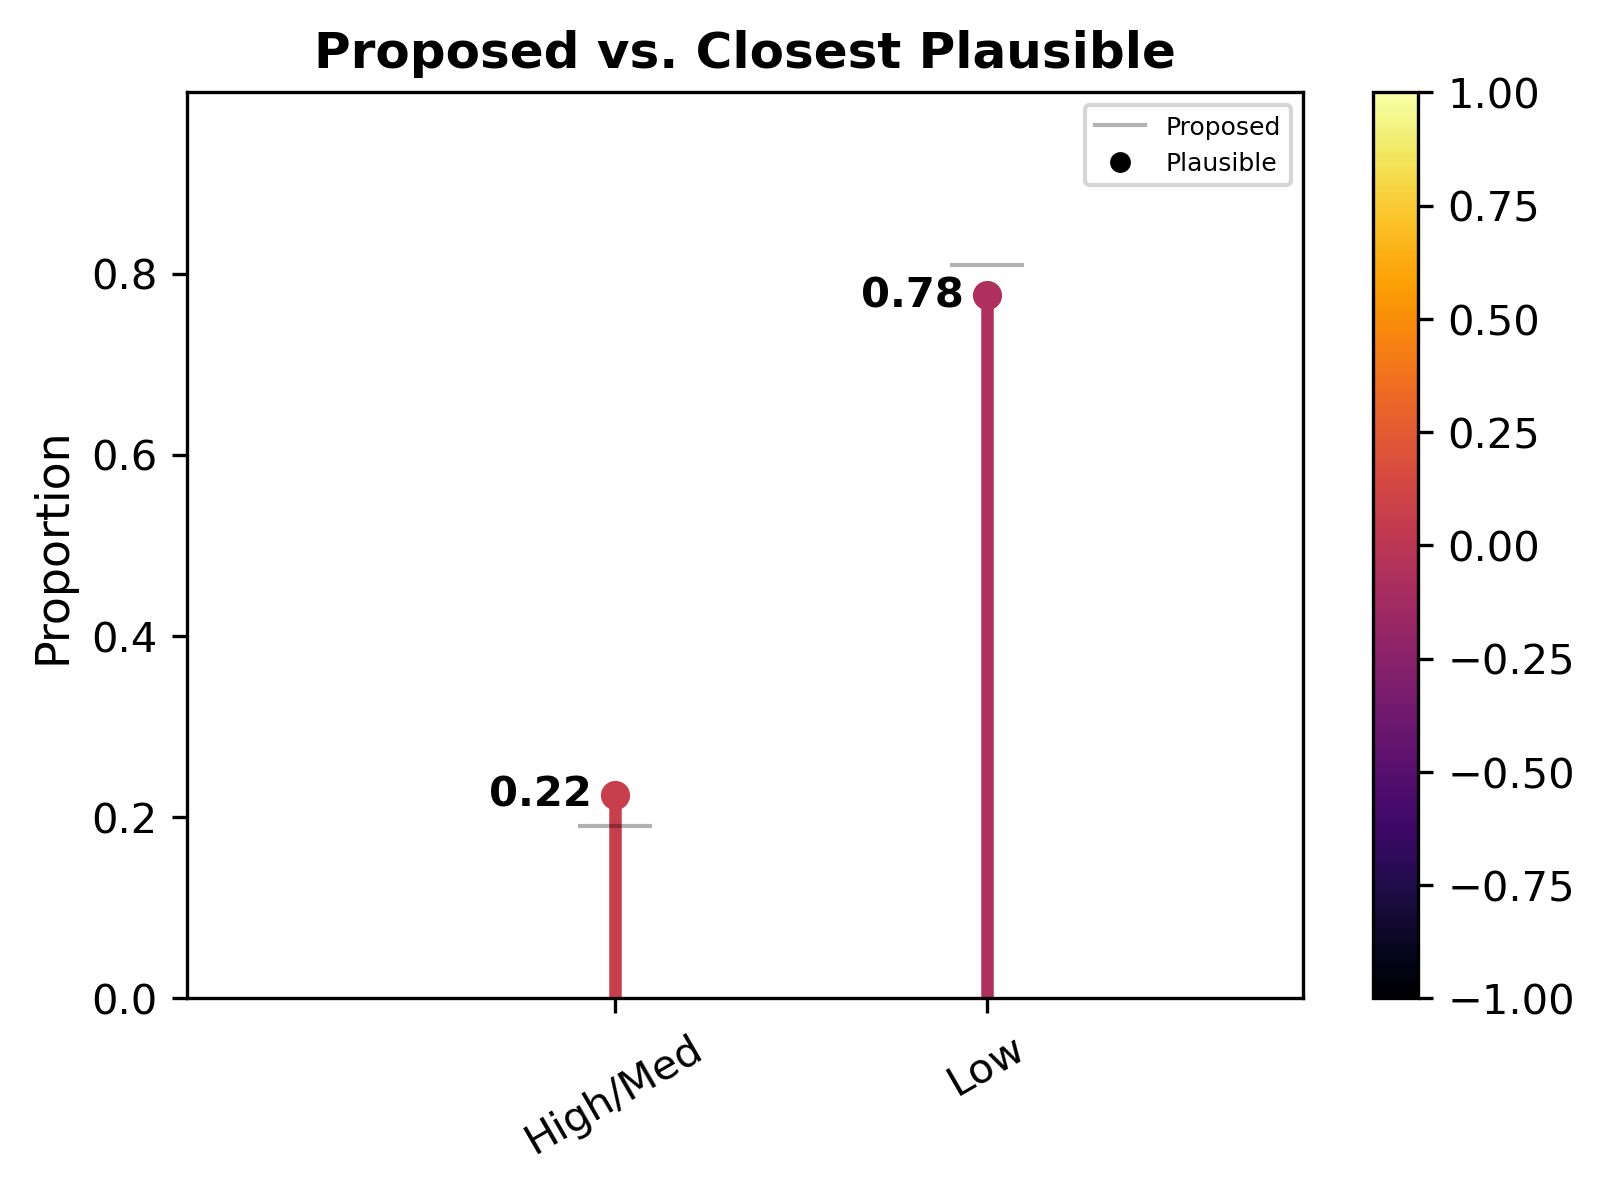

In [7]:
# Setup and Experiments
battery_scores = list(filter(lambda x: not x == 'N/A', battery_scores))
battery_binary = [x if x =='Low' else 'High/Med' for x in battery_scores]

#~19% of violent offenders recidivate within two years according to the Florida Dept. of Corrections
null_props = [.19,1-.19]

print("Null hypothesis (proposed distribution): " + str(null_props) + "\n")

q_null_props = hypothesis_test(battery_binary,\
                ['High/Med', 'Low'],\
                alpha = 0.05, hypothesis = null_props)[4]

graph_distributions(q_null_props,\
                    [('High/Med'),('Low')],
                    hypothesis=null_props, xl = [('High/Med'),('Low')], 
                    filename=r"Results/compas_battery_demo.pdf")

Null hypothesis (proposed distribution): [0.12, 0.88]

Proposed distribution rejected at alpha = 0.05. Kardis = 1.16155533686339e-124.
Any plausible distribution must boost probability over the given distribution by 4.3045732229183e+122, and will therefore have a minimum probability of 2.18691769235091e-5.
Closest plausible distribution: [0.43851394975065844, 0.5614860502493415]


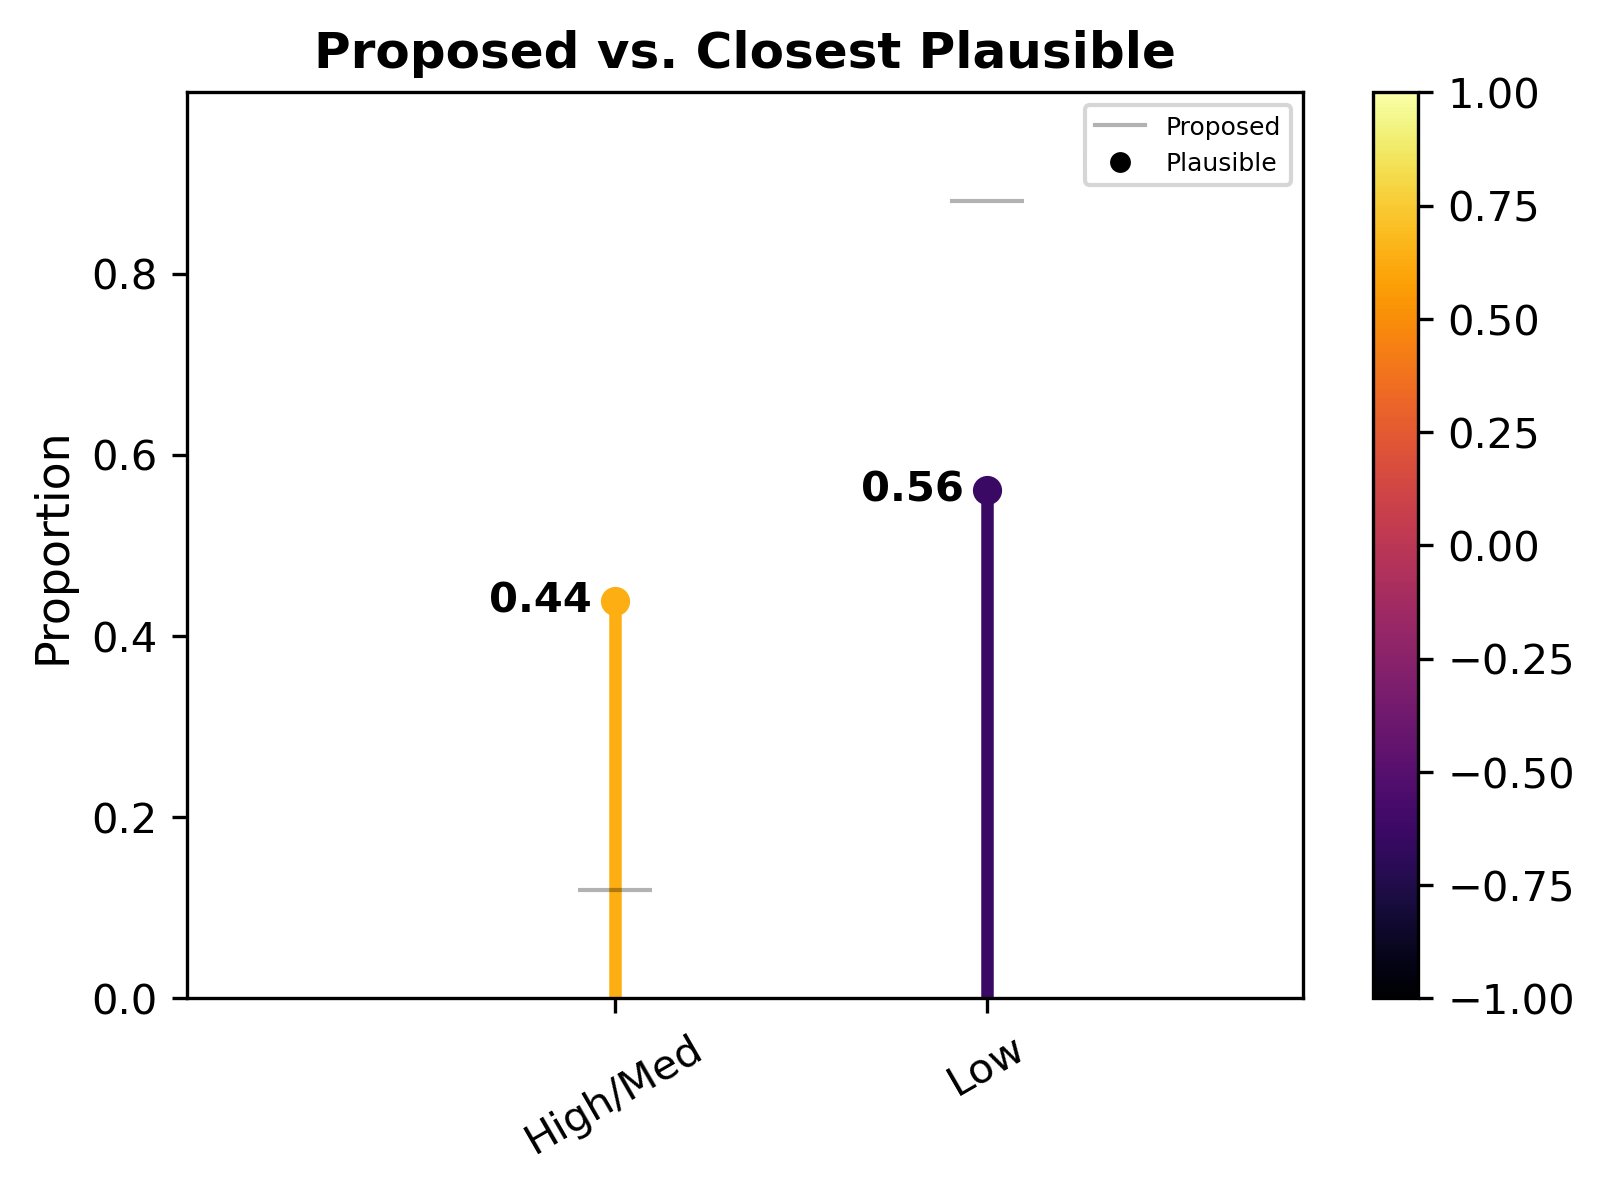

In [8]:
# Setup and Experiments
possession_scores = list(filter(lambda x: not x == 'N/A', possession_scores))
possession_binary = [x if x =='Low' else 'High/Med' for x in possession_scores]

#~12% of drug offenders recidivate within two years according to the Florida Dept. of Corrections
null_props = [.12,1-.12]

print("Null hypothesis (proposed distribution): " + str(null_props) + "\n")

q_null_props = hypothesis_test(possession_binary,\
                ['High/Med', 'Low'],\
                alpha = 0.05, hypothesis = null_props)[4]

graph_distributions(q_null_props,\
                    [('High/Med'),('Low')],
                    hypothesis=null_props, xl = [('High/Med'),('Low')], 
                    filename=r"Results/compas_possession_demo.pdf")